
# Steps:

    (1) Look at data

    (2) Combine into a single tab-delimited file 

    (3)(1) Sort & remove duplicate lines & (2) Remove near duplicate lines

    (4) Remove lines where SRC == TRG or where SRC ~= TRG

### (1) Look at data

In [1]:
!pwd

/Users/alexskrn/Documents/NLP/HSE/final_project/project/jupyter_notebooks


In [4]:
PROC_DATA_PREFIX = '../wiki-matrix-data'

SRC_EN = 'WikiMatrix.en-ru.txt.en'
SRC_RU = 'WikiMatrix.en-ru.txt.ru'

In [8]:
# Number of lines
!wc -l {PROC_DATA_PREFIX}/{SRC_EN}
!wc -l {PROC_DATA_PREFIX}/{SRC_RU}

  508579 ../wiki-matrix-data/WikiMatrix.en-ru.txt.en
  508579 ../wiki-matrix-data/WikiMatrix.en-ru.txt.ru


### (2) Combine into a single tab-delimited file

In [9]:
!paste {PROC_DATA_PREFIX}/{SRC_EN} {PROC_DATA_PREFIX}/{SRC_RU} > \
       {PROC_DATA_PREFIX}/en_ru

!wc -l {PROC_DATA_PREFIX}/en_ru
!head -4 {PROC_DATA_PREFIX}/en_ru

  508579 ../wiki-matrix-data/en_ru
The glory of the Lord has risen upon thee".	Какую же из милостей вашего Господа вы считаете ложью?».
Fear of the Lord is aking to wonder (or awe).	Воистину, мучений от твоего Господа надлежит остерегаться».
I think I washed his body 50 times."	Я думаю, что я омыла его тело 50 раз.»
There has come to you clear evidence from your Lord.	К вам пришло ясное знамение от вашего Господа.


### (3)(1) Sort & remove duplicate lines 

In [10]:
!sort -u {PROC_DATA_PREFIX}/en_ru > {PROC_DATA_PREFIX}/en_ru_sort_uniq
!wc -l {PROC_DATA_PREFIX}/en_ru_sort_uniq
!head -4 {PROC_DATA_PREFIX}/en_ru_sort_uniq

  508579 ../wiki-matrix-data/en_ru_sort_uniq
最弱と呼ばれても...岩谷麻優、いつか見つける青い鳥.	最弱と呼ばれても...岩谷麻優、いつか見つける青い鳥 (яп.) (недоступная ссылка).
Ćosić had a successful career in Europe, winning numerous league and club titles, as well as six gold medals with the Yugoslavian national team.	Чосич имел успешную карьеру в Европе, выиграв множество клубных и личных титулов, а также шесть золотых медалей со сборной Югославии.
Ćosić maintained that he did so in order to better understand the Stalinist mind.	Чосич всегда утверждал позднее, что сделал это для лучшего понимания образа мыслей сталинистов.
昆明犬|中国狼青|中国昆明犬档案 – 狗民网 – 狗与爱的世界.	昆明犬|中国狼青|中国昆明犬档案 — 狗民网 — 狗与爱的世界.


In [12]:
!tail -10 {PROC_DATA_PREFIX}/en_ru_sort_uniq

Özal believed Turkey's future security depended on the continuation of a strong relationship with the United States.	Тургут Озал полагал, что будущая безопасность Турции тесно связана с продолжением партнерских отношений с Соединенными Штатами.
Özal supported the IMF, and to this end he forced the resignation of the director of the Central Bank, İsmail Aydınoğlu, who opposed it.	Озал поддерживал международный валютный фонд и вынудил уйти в отставку директора Центрального банка Исмаила Айдыноглу, который противостоял этому.
Özarı's career as a player ended early due to his desire to become a coach.	Карьера Озары в качестве игрока закончилась рано из-за его желания стать тренером.
Özbiliz was given from the President of the Football Federation of Armenia Ruben Hayrapetyan an Armenia team T-shirt with the number 23.	Озбилиз от президента Федерации футбола Армении Рубена Айрапетяна получил футболку сборной Армении под номером 23.
Øystein claimed part of his father's inheritance and was giv

### (3)(2) Remove near duplicate lines

In [1]:
import nltk
from nltk.metrics.distance import jaro_similarity

In [14]:
# Get rid of near duplicate lines
# takes long - wait !
threshold = 0.85
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim', 'w', encoding='utf8') as toF:
    prev_line = inF.readline()
    for curr_line in inF:
        if jaro_similarity(prev_line, curr_line) > threshold:  # Two lines are very similar,
            prev_line = curr_line                              # forget previous line
        else:
            toF.write(prev_line)   # If not similar, put previous line into file,
            prev_line = curr_line  # then forget previous line

!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim'

  508579 ../wiki-matrix-data/en_ru_sort_uniq
  508426 ../wiki-matrix-data/en_ru_sort_uniq_remsim



# Remove lines with non-ExtendedLatin or non-Cyrillic characters

In [ ]:
import os

def has_non_ascii(line):
    """Check if line contains unwanted characters.
    
    Return True if outside of UTF-8 decimal range 0-383 for Extended Latin."""
    for char in line:
        if ord(char) > 383:
            return True
    return False

def has_non_ascii_and_cyr(line):
    """Check if line contains unwanted characters
    
    Return True if outside of UTF-8 decimal range 0-383 or 1024-1279
    for Extended Latin and Cyrillic, respectively."""
    for char in line:
        condition_1 = ord(char) > 383 and ord(char) < 1024
        condition_2 = ord(char) > 1279
        if condition_1 or condition_2:
            return True
    return False

In [71]:
ttl_count = 0
count_en = 0
count_ru = 0
idx_en = []
idx_ru = []
with open(os.path.join(PROC_DATA_PREFIX, 'en_ru_sort_uniq_remsim'), 'r', encoding='utf8') as f:
    for idx, line in enumerate(f):
        en, ru = line.split('\t')
        en_side_cond = has_non_ascii(en)
        ru_side_cond = has_non_ascii_and_cyr(ru)
        if en_side_cond:
            count_en += 1
            idx_en.append(idx)
        if ru_side_cond:
            count_ru += 1
            idx_ru.append(idx)
        if en_side_cond or ru_side_cond:
            ttl_count += 1

print('# of lines with non-Extended-Latin chars in en: ', count_en)
print('# of lines with non-Extended-Latine or non-Cyrillic chars in ru: ', count_ru)
print('Total # of violating lines: ', ttl_count)

# of lines with non-Extended-Latin chars in en:  30256
# of lines with non-Extended-Latine or non-Cyrillic chars in ru:  54968
Total # of violating lines:  68221


In [73]:
!head -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim'

最弱と呼ばれても...岩谷麻優、いつか見つける青い鳥.	最弱と呼ばれても...岩谷麻優、いつか見つける青い鳥 (яп.) (недоступная ссылка).
Ćosić had a successful career in Europe, winning numerous league and club titles, as well as six gold medals with the Yugoslavian national team.	Чосич имел успешную карьеру в Европе, выиграв множество клубных и личных титулов, а также шесть золотых медалей со сборной Югославии.


In [72]:
idx_en[:10]

[0, 3, 4, 5, 6, 21, 22, 23, 24, 25]

In [81]:
!sed -n {idx_en[0] + 1}p {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim'

最弱と呼ばれても...岩谷麻優、いつか見つける青い鳥.	最弱と呼ばれても...岩谷麻優、いつか見つける青い鳥 (яп.) (недоступная ссылка).


In [83]:
!sed -n {idx_en[1] + 1}p {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim'

昆明犬|中国狼青|中国昆明犬档案 – 狗民网 – 狗与爱的世界.	昆明犬|中国狼青|中国昆明犬档案 — 狗民网 — 狗与爱的世界.


In [85]:
with open(os.path.join(PROC_DATA_PREFIX, 'en_ru_sort_uniq_remsim'), 'r', encoding='utf8') as fromF,\
    open(os.path.join(PROC_DATA_PREFIX, 'en_ru_sort_uniq_remsim_ascii'), 'w', encoding='utf8') as toF:
    for line in fromF:
        en, ru = line.split('\t')
        en_side_cond = has_non_ascii(en)
        ru_side_cond = has_non_ascii_and_cyr(ru)
        if en_side_cond or ru_side_cond:
            pass
        else:
            toF.write(line)

!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_ascii'   

  508426 ../wiki-matrix-data/en_ru_sort_uniq_remsim
  440205 ../wiki-matrix-data/en_ru_sort_uniq_remsim_ascii


### (4) Remove lines where ENG == RUS or ENG ~= RUS

In [86]:
# Examples of similar SRC and TRG
# !sed -n -e '34934{p;q;}' file

In [93]:
# !sed -n -e '28134{p;q;}' file

In [88]:
# # ENG and RUS are very similar
# str1 = "95-37553 (E) 281195"
# str2 = "95-37555.R 281195 281195"
# jaro_similarity(str1, str2)

In [89]:
# # ENG and RUS are not similar
# str1 = """Гуманитарный призыв"""
# str2 = """Humanitarian appeal"""
# jaro_similarity(str1, str2)

In [5]:
str1 = "Aphrodite finally hits stores in the US today!."
str2 = "«Aphrodite» finally hits stores in the US today! (англ.) (недоступная ссылка)."
jaro_similarity(str1, str2)

0.8675213675213675

In [90]:
# Count all similarity scores - takes long - wait !
jaro_simil_scores_list = []
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_ascii', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'sim_scores.txt', 'w', encoding='utf8') as toF:
    for line in inF:
        line_list = line.split('\t')
        src_str, trg_str = line_list[0].strip(), line_list[1].strip()
        sim_score = jaro_similarity(src_str, trg_str)
        jaro_simil_scores_list.append(sim_score)
        toF.write('{}\n'.format(sim_score))

print(len(jaro_simil_scores_list))
!wc -l {PROC_DATA_PREFIX}/sim_scores.txt
!wc -l {PROC_DATA_PREFIX}/en_ru_sort_uniq_remsim_ascii

440205
  440205 ../wiki-matrix-data/sim_scores.txt
  508426 ../wiki-matrix-data/en_ru_sort_uniq_remsim


In [91]:
# Keep lines where ENG and RUS are very distinct
threshold = 0.45
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_ascii', 'r', encoding='utf8') as inF_text, \
    open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_ascii_jaro', 'w', encoding='utf8') as toF_text:
    for i, line in enumerate(inF_text):
        if jaro_simil_scores_list[i] < threshold:  # If SRC and TRG are not too simialr, keep the line
            toF_text.write(line)

wc: ../wiki-matrix-data/en_ru_sort_uniq_remsim_jaro: open: No such file or directory


In [92]:
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_ascii_jaro'

  344460 ../wiki-matrix-data/en_ru_sort_uniq_remsim_ascii_jaro


In [94]:
!cp {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_ascii_jaro' \
    {PROC_DATA_PREFIX}/'cleaned_bitext.txt'

In [95]:
!head -5 {PROC_DATA_PREFIX}/'cleaned_bitext.txt'

Ćosić had a successful career in Europe, winning numerous league and club titles, as well as six gold medals with the Yugoslavian national team.	Чосич имел успешную карьеру в Европе, выиграв множество клубных и личных титулов, а также шесть золотых медалей со сборной Югославии.
Ćosić maintained that he did so in order to better understand the Stalinist mind.	Чосич всегда утверждал позднее, что сделал это для лучшего понимания образа мыслей сталинистов.
Čabrinović and Princip died of tuberculosis in prison.	Чабринович, как и Принцип, умер в тюрьме от туберкулёза.
Čabrinović moved back into his father's house in Sarajevo.	Чабринович вернулся в дом своего отца в Сараеве.
Čachtice has received the status of a town in 1392, but it was later degraded back to a village.	Чахтице в 1392 году получило статус города, но позже опять стало деревней.


# To pandas DataFrame

In [97]:
data = []
with open(os.path.join(PROC_DATA_PREFIX, 'cleaned_bitext.txt'), 'r', encoding='utf8') as f:
    for line in f:
        en, ru = line.split('\t')
        en, ru = en.strip(), ru.strip()
        data.append((en, ru))

In [98]:
import pandas as pd

df = pd.DataFrame(data, columns=['en', 'ru'])

In [99]:
df.head()

,en,ru
0,"Ćosić had a successful career in Europe, winni...","Чосич имел успешную карьеру в Европе, выиграв ..."
1,Ćosić maintained that he did so in order to be...,"Чосич всегда утверждал позднее, что сделал это..."
2,Čabrinović and Princip died of tuberculosis in...,"Чабринович, как и Принцип, умер в тюрьме от ту..."
3,Čabrinović moved back into his father's house ...,Чабринович вернулся в дом своего отца в Сараеве.
4,Čachtice has received the status of a town in ...,"Чахтице в 1392 году получило статус города, но..."


In [104]:
df.shape

(344460, 2)

In [105]:
df.isna().sum()

en    0
ru    0
dtype: int64

In [106]:
print(df.loc[2371])
print(df.loc[2965])

en                 .]]
ru    Ёситаро Номура).
Name: 2371, dtype: object
en           3004.
ru    Почему 4004?
Name: 2965, dtype: object


In [109]:
df.drop([2371, 2965], inplace=True)

In [110]:
df.shape

(344458, 2)

# To .tsv file

In [111]:
df.to_csv(os.path.join(PROC_DATA_PREFIX, 'cleaned_bitext.tsv'),
          sep='\t',
         index=False
         )

In [127]:
df = pd.read_csv(os.path.join(PROC_DATA_PREFIX, 'cleaned_bitext.tsv'),
            sep='\t'
           )
print(df.shape)
df.head()

(344458, 2)


,en,ru
0,"Ćosić had a successful career in Europe, winni...","Чосич имел успешную карьеру в Европе, выиграв ..."
1,Ćosić maintained that he did so in order to be...,"Чосич всегда утверждал позднее, что сделал это..."
2,Čabrinović and Princip died of tuberculosis in...,"Чабринович, как и Принцип, умер в тюрьме от ту..."
3,Čabrinović moved back into his father's house ...,Чабринович вернулся в дом своего отца в Сараеве.
4,Čachtice has received the status of a town in ...,"Чахтице в 1392 году получило статус города, но..."


In [131]:
idx_to_del = [301, 470, 598, 1786, 28949, 30834, 82651, 112950, 152069, 179739, 179756, 187081,
 189852, 202804, 210494, 218046, 225407, 231795, 301153, 329733, 334206, 343912]

In [132]:
for idx in idx_to_del:
    print(df.loc[idx])

en                 "Chaos;HEAd".
ru    Появляется и в Chaos;Head.
Name: 301, dtype: object
en           "Except us.
ru    Никто, кроме нас!»
Name: 470, dtype: object
en    "He's Everywhere!
ru         «Он повсюду!
Name: 598, dtype: object
en        "What about them?".
ru    Ты знаешь, что с ними?»
Name: 1786, dtype: object
en    And often forever.
ru     И часто навсегда.
Name: 28949, dtype: object
en    Anywhere!"
ru      Везде!».
Name: 30834, dtype: object
en     Forever?
ru    Навсегда?
Name: 82651, dtype: object
en    How to you.
ru          А ты?
Name: 112950, dtype: object
en    Indeed!".
ru        Ин)».
Name: 152069, dtype: object
en       Maybe even ever?"
ru    Хоть когда-нибудь?».
Name: 179739, dtype: object
en    Maybe they're around somewhere.
ru     Может быть, где-то они и есть.
Name: 179756, dtype: object
en        Never do it differently.
ru    Никогда не поступайте иначе.
Name: 187081, dtype: object
en      Now & Then.
ru    Сейчас&Потом.
Name: 189852, dtype: object
en

In [133]:
df.drop(idx_to_del, inplace=True)
df.shape

(344436, 2)

In [134]:
df.to_csv(os.path.join(PROC_DATA_PREFIX, 'cleaned_bitext_344436.tsv'),
          sep='\t',
         index=False
         )

df = pd.read_csv(os.path.join(PROC_DATA_PREFIX, 'cleaned_bitext_344436.tsv'),
            sep='\t'
           )
print(df.shape)
df.head()

(344436, 2)


,en,ru
0,"Ćosić had a successful career in Europe, winni...","Чосич имел успешную карьеру в Европе, выиграв ..."
1,Ćosić maintained that he did so in order to be...,"Чосич всегда утверждал позднее, что сделал это..."
2,Čabrinović and Princip died of tuberculosis in...,"Чабринович, как и Принцип, умер в тюрьме от ту..."
3,Čabrinović moved back into his father's house ...,Чабринович вернулся в дом своего отца в Сараеве.
4,Čachtice has received the status of a town in ...,"Чахтице в 1392 году получило статус города, но..."


STOPPED HERE

### (5) Word tokenize (+ remove punct, digits, stop words) 

In [1]:
import string
import nltk

stopwords = ['the', 'a', 'an', 'of',
#              's', 'and', 'и', 'or', 'или',   # Inclusion of these into stop words 
#              'been', 'being', 'by'           # causes word alignment to deteriorate
            ]

def preprocess(text):
    """Return a string cleaned up."""
    text = text.lower()  # lowercase
    # word-tokenize & remove numbers if the entire token consists of numbers
    text = ' '.join(t for t in nltk.wordpunct_tokenize(text) if not t.isdigit() and not t in stopwords)
    # remove punctuation
    punct_remove = set(string.punctuation) | {'−', '\t', '\n', '\r', '\x0b', '\x0c', '◦', '°'}
    text = ''.join(char for char in text if char not in punct_remove)
    # strip extra whitespaces
    text = ' '.join(text.split())
    return text

In [27]:
# check if it works as expected
# text = """!"#$%&'()*+,-−./:;<=>?@[\]^_`{|}~"""
text = "◦ The Participation as a partner in an the international facility in Russia to provide enrichment services for a reliable supply of fuel to Iran's nuclear reactors."
preprocess(text)

'participation as partner in international facility in russia to provide enrichment services for reliable supply fuel to iran s nuclear reactors'

In [28]:
# Word tokenize and clean up - from now on I have two files - raw text and tokenized text
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_tok', 'w', encoding='utf8') as toF:
    for line in inF:
        line_list = line.split('\t')
        src_str, trg_str = line_list[0].strip(), line_list[1].strip()
        toF.write('{}\t{}\n'.format(preprocess(src_str), preprocess(trg_str)))

In [29]:
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok'

   25971 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro
   25971 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_tok


In [30]:
print('BEFORE\n')
!head -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro'
!tail -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro'
print('\nAFTER\n')
!head -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok'
!tail -2 {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok'

BEFORE

− Antoine Kesia-Mbe Mindua (Democratic Republic of Congo)	- Антуан Кесия-Мбе Миндуа (Демократическая Республика Конго)
− Howard Morrison (United Kingdom)	- Говард Моррисон (Соединенное Королевство)
◦ Development with IAEA of a standing multilateral mechanism for reliable access to nuclear fuel, based on ideas to be considered at the next meeting of the Board of Governors.	:: создания совместно с МАГАТЭ постоянного многостороннего механизма надежного обеспечения доступа к ядерному топливу на основе идей, которые будут рассмотрены на следующем заседании Совета управляющих.
◦ Establishment on commercial terms of a buffer stock to hold a reserve of up to five years' supply of nuclear fuel dedicated to Iran, with the participation and under supervision of IAEA.	:: создания на коммерческих началах резервных запасов предназначенного для Ирана ядерного топлива, рассчитанных на пять лет, при участии и под контролем МАГАТЭ;

AFTER

antoine kesia mbe mindua democratic republic congo	антуа

### (6)(1) Remove outliers (where diff in sentence length between SRC and TRG is too large)

In [31]:
# Count sentence lengths
def count_sent_len(data_prefix, file_in, file_out):
    """Count sentence length in tab-delim file_in and write counts to file_out."""
    with open(data_prefix + '/' + file_in, 'r', encoding='utf8') as inF, \
        open(data_prefix + '/' + file_out, 'w', encoding='utf8') as toF_nums:
        for line in inF:
            line_list = line.split('\t')
            src_str, trg_str = line_list[0].strip(), line_list[1].strip()
            src_len, trg_len = len(src_str.split()), len(trg_str.split())
            toF_nums.write('{}\t{}\n'.format(src_len, trg_len))

In [32]:
count_sent_len(PROC_DATA_PREFIX, 'en_ru_sort_uniq_remsim_jaro_tok', 'sent_lengths.txt')

In [33]:
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok'
!wc -l {PROC_DATA_PREFIX}/'sent_lengths.txt'
!head -3 {PROC_DATA_PREFIX}/'sent_lengths.txt'

   25971 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_tok
   25971 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/sent_lengths.txt
7	7
4	4
4	4


In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

my_data = pd.read_csv(PROC_DATA_PREFIX + '/' + 'sent_lengths.txt', sep='\t', header=None)
my_data.columns = ['src_len', 'trg_len']

In [35]:
my_data['diff'] = my_data.loc[:, 'src_len'] - my_data.loc[:, 'trg_len']
my_data.head()

,src_len,trg_len,diff
0,7,7,0
1,4,4,0
2,4,4,0
3,5,5,0
4,5,5,0


In [36]:
my_data.tail()

,src_len,trg_len,diff
25966,39,38,1
25967,29,34,-5
25968,3,3,0
25969,23,24,-1
25970,25,21,4


In [39]:
# Calculate the mean difference and standard deviation of the difference in length
diff_mean = np.mean(my_data.loc[:, "diff"])
diff_std = np.std(my_data.loc[:, "diff"])
print('Mean difference and standard deviation of the difference in length between SRC and TRG senteces:')
print(diff_mean, diff_std)

Mean difference and standard deviation of the difference in length between SRC and TRG senteces:
-2.3534326749066268 4.74472866424436


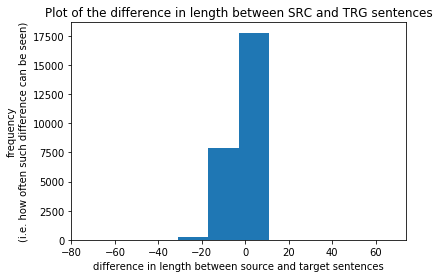

In [40]:
# Plot the differences
plt.hist(my_data.loc[:, "diff"])
plt.title('Plot of the difference in length between SRC and TRG sentences')
plt.xlabel("difference in length between source and target sentences")
plt.ylabel("frequency\n(i.e. how often such difference can be seen)")
plt.show()

In [ ]:
# The above shows that Russian translations are usually longer than the English sources

In [41]:
# Maximum number of standard deviations allowed in the difference 
# in length between the source and target sentences
std = 2
limit_hi = diff_mean + std * diff_std
limit_lo = diff_mean - std * diff_std
print(limit_lo, limit_hi)

-11.842890003395347 7.136024653582094


In [42]:
# Inspect sentences regarded as outliers by the above standard 
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_tok', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'outliers_at_2_std.txt', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, "diff"][idx] > limit_hi) or (my_data.loc[:, "diff"][idx] < limit_lo):
            toF.write(line)  # write sentences where difference in length is outside of above limits

!wc -l {PROC_DATA_PREFIX}/'outliers_at_2_std.txt'
!head -3 {PROC_DATA_PREFIX}/'outliers_at_2_std.txt'

    1238 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/outliers_at_2_std.txt
security council encourages all ecowas states especially those most affected by illicit trade in small arms and light weapons to submit as did other states national reports on actions undertaken to implement united nations programme action for small arms and light weapons to secretary general in advance biennial review meeting	совет безопасности побуждает все государства эковас особенно те из них которые в наибольшей мере затрагивает незаконная торговля стрелковым оружием и легкими вооружениями представить генеральному секретарю как это сделали другие государства национальные доклады о принятых ими мерах по осуществлению программы действий организации объединенных наций по стрелковому оружию и легким вооружениям до начала проводимого раз в два года совещания по рассмотрению действия которое состоится в году
c l0 corrosion resistant multiple seal canned drive magnetic drive bellows or diaphra

In [43]:
# remove outliers from raw text & tokenized text files
# tokenized file first
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_tok', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_tok_2std', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, "diff"][idx] < limit_hi) and (my_data.loc[:, "diff"][idx] > limit_lo):
            toF.write(line)  # keep line if difference is within above limits
            
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok_2std'

   25971 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_tok
   24733 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_tok_2std


In [44]:
# remove outliers from raw text & tokenized text files
# raw text next
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_2std', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (my_data.loc[:, "diff"][idx] < limit_hi) and (my_data.loc[:, "diff"][idx] > limit_lo):
            toF.write(line)  # keep line if difference is within above limits
            
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_2std'

   25971 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro
   24733 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_2std


### (6)(2) Remove too long sentences

In [45]:
import pandas as pd

counts_data = pd.read_csv(PROC_DATA_PREFIX + '/' + 'sent_lengths.txt', sep='\t', header=None)
counts_data.columns = ['src_len', 'trg_len']
print(counts_data.shape)
counts_data.head()

(25971, 2)


,src_len,trg_len
0,7,7
1,4,4
2,4,4
3,5,5
4,5,5


In [46]:
# Remove too long sentences
# Raw file first -- This file is to go into Database
threshold = 40
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_2std', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_2std_40', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (counts_data.loc[:, 'src_len'][idx] < threshold) and (counts_data.loc[:, 'trg_len'][idx] < threshold):
            toF.write(line)  # keep lines which are less than 40 words long

In [48]:
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_2std'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_2std_40'

   24733 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_2std
   14561 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_2std_40


In [49]:
# Remove too long sentences
# Tok file -- This file is be used for Word Alignment
threshold = 40
with open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_tok_2std', 'r', encoding='utf8') as inF, \
     open(PROC_DATA_PREFIX + '/' + 'en_ru_sort_uniq_remsim_jaro_tok_2std_40', 'w', encoding='utf8') as toF:
    for idx, line in enumerate(inF):
        if (counts_data.loc[:, 'src_len'][idx] < threshold) and (counts_data.loc[:, 'trg_len'][idx] < threshold):
            toF.write(line)  # keep lines which are less than 40 words long

!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok_2std'
!wc -l {PROC_DATA_PREFIX}/'en_ru_sort_uniq_remsim_jaro_tok_2std_40'

   24733 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_tok_2std
   14561 /Users/alexskrn/Documents/NLP/WordAlign/wordalign_notebooks/data/en_ru_sort_uniq_remsim_jaro_tok_2std_40
